In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import random as r

In [122]:
df_healthy = pd.read_csv("/Users/aliyadavletshina/Downloads/aliya_healthy-3.csv", index_col = 0)
df_healthy.head()

df_trans = pd.read_csv("/Users/aliyadavletshina/Desktop/Bocconi/business analytics/HFarm_project/hfarm.csv", index_col = 0)
df_trans.head()

# df_healthy.columns

/Users/aliyadavletshina/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,id,mall,date,customer,desc,net_am,n_unit
0,1001,2,2016-01-14 20:07:00+00:00,77021708271,caramelos s/azucar,1.00,1
1,1002,1,2016-01-14 15:25:00+00:00,77021708271,tosta variada,3.00,1
2,1002,1,2016-01-14 15:25:00+00:00,77021708271,baguette tortilla,1.00,1
3,1003,2,2016-01-14 20:07:00+00:00,77021708271,queso tierno mezcl,2.83,1
4,1003,2,2016-01-14 20:07:00+00:00,77021708271,guisantes muy fino,1.65,1


In [176]:
print(df_trans['id'].nunique(), df_trans['customer'].nunique())

580437 65934


### What are the most popular products among healthy customers? 

In [123]:
# df_healthy = df_healthy.drop(['day_of_year', 'hour', 'net_am','month'], axis = 1)
df_healthy[df_healthy['Healthy'] == 1].iloc[:, :-1].idxmax(axis=1).value_counts().head()

day_of_year    4149
hour            224
dtype: int64

Most popular products among healthy people are **vegetables, fruit, fish.** 
Junk wasn't supposed to be there :)

In [125]:
df_trans = df_trans[df_trans['customer'] != 'Unknown']
df_trans.customer = df_trans.customer.astype(int)
df_healthy_cust = pd.merge(df_trans, df_healthy.reset_index()[['customer', 'Healthy']], how ='inner', on = 'customer')
df_healthy_cust


,id,mall,date,customer,desc,net_am,n_unit,Healthy
0,1001,2,2016-01-14 20:07:00+00:00,77021708271,caramelos s/azucar,1.00,1,0
1,1002,1,2016-01-14 15:25:00+00:00,77021708271,tosta variada,3.00,1,0
2,1002,1,2016-01-14 15:25:00+00:00,77021708271,baguette tortilla,1.00,1,0
3,1003,2,2016-01-14 20:07:00+00:00,77021708271,queso tierno mezcl,2.83,1,0
4,1003,2,2016-01-14 20:07:00+00:00,77021708271,guisantes muy fino,1.65,1,0
...,...,...,...,...,...,...,...,...
5609617,586468,1,2016-04-16 11:21:00+00:00,77098881832,galleta delicia flor,7.80,10,0
5609618,586468,1,2016-04-16 11:21:00+00:00,77098881832,lejia lavadora ace,1.50,2,0
5609619,586468,1,2016-04-16 11:21:00+00:00,77098881832,brandy conde osbor,23.35,1,0
5609620,586468,1,2016-04-16 11:21:00+00:00,77098881832,cerveza mahou clas,4.00,1,0


In [119]:
df_healthy_cust.groupby('mall')['Healthy'].value_counts()

mall  Healthy
1     0          2547623
      1           246361
2     0          2563139
      1           252499
Name: Healthy, dtype: int64

In [247]:
print(df_healthy_cust.drop_duplicates('customer')['Healthy'].value_counts())
print(df_healthy_cust.drop_duplicates('customer')['Healthy'].value_counts()[1]*100/df_healthy_cust.drop_duplicates('customer')['Healthy'].value_counts().sum())

0    50276
1     4373
Name: Healthy, dtype: int64
8.001976248421746


### What are the most popular products bought?

In [126]:
desc_most_popular = df_healthy_cust.desc.value_counts()
desc_most_popular = desc_most_popular[desc_most_popular > 500]
desc_most_popular

bolsa carrefour         98908
platano 1a bolsa        35605
pan pistola/barra       23086
freson tarrina 500      18185
panecillos surtidos     17173
                        ...  
bifidus fresa/platan      501
gamba gorda pink          501
gel wc azul carref        501
bacon cocido              501
pechuga pavo noel         501
Name: desc, Length: 2131, dtype: int64

In [127]:
df_trans = df_healthy_cust.copy()
print("----------------Most popular products among healthy people:----------------\n", df_trans[df_trans['Healthy'] == 1]['desc'].value_counts()[:13])
print("----------------Most popular products among unhealthy people:----------------:\n", df_trans[df_trans['Healthy'] == 0]['desc'].value_counts().head(13))


----------------Most popular products among healthy people:----------------
 bolsa carrefour         8316
platano 1a bolsa        3390
pan pistola/barra       1862
freson tarrina 500      1680
limon carrefour 750g    1637
banana granel           1569
pera conferencia        1569
panecillos surtidos     1497
freson caja 2 kg        1492
manzana golden          1428
baguette carrefour      1378
zanahoria bolsa 1kg     1352
pimiento italiano       1295
Name: desc, dtype: int64
----------------Most popular products among unhealthy people:----------------:
 bolsa carrefour        90592
platano 1a bolsa       32215
pan pistola/barra      21224
freson tarrina 500     16505
baguette carrefour     15736
panecillos surtidos    15676
zanahoria bolsa 1kg    13714
pimiento italiano      13288
cerveza mahou clas     12893
calabacin campo        12104
cebolla carrefour      11730
freson caja 2 kg       11707
atun claro aceite      11600
Name: desc, dtype: int64


Most popular products are similar for healthy and unhealthy people. 

In [139]:
for i in df_trans:
    print(i,": ", df_trans[i].nunique()) # unique values for each column

id :  586479
mall :  2
date :  134711
customer :  66058
desc :  53429
net_am :  6153
n_unit :  183
Healthy :  2


In [128]:
# separating date and time from timestamp 
df_trans['date'] = pd.to_datetime(df_trans['date'])
df_trans['time'] = df_trans['date'].dt.time
df_trans['date'] = df_trans['date'].dt.date

# adding day of the week
a = ['Thur', 'Fri', "Sat", 'Sun', 'Mon', 'Tue', 'Wed']
date_weekday = pd.DataFrame({'date': df_trans.date.unique(), 'day_of_week': np.resize(a, len(df_trans.date.unique()))})
df_trans = date_weekday.merge(df_trans, how='right', on='date') 
df_trans 

,date,day_of_week,id,mall,customer,desc,net_am,n_unit,Healthy,time
0,2016-01-14,Thur,1001,2,77021708271,caramelos s/azucar,1.00,1,0,20:07:00
1,2016-01-14,Thur,1002,1,77021708271,tosta variada,3.00,1,0,15:25:00
2,2016-01-14,Thur,1002,1,77021708271,baguette tortilla,1.00,1,0,15:25:00
3,2016-01-14,Thur,1003,2,77021708271,queso tierno mezcl,2.83,1,0,20:07:00
4,2016-01-14,Thur,1003,2,77021708271,guisantes muy fino,1.65,1,0,20:07:00
...,...,...,...,...,...,...,...,...,...,...
5609617,2016-04-17,Mon,581413,1,77023558475,patatas lays sal,2.43,2,0,00:00:00
5609618,2016-04-17,Mon,581413,1,77023558475,mayonesa 450 mlmus,2.14,2,0,00:00:00
5609619,2016-04-17,Mon,581413,1,77023558475,salsa cesar ensala,1.00,1,0,00:00:00
5609620,2016-04-17,Mon,581413,1,77023558475,bolsa carrefour,0.05,1,0,00:00:00


There are some values with negative or zero price. Can we delete them?

In [129]:
print(round(df_trans[(df_trans['n_unit'] <= 0) | (df_trans['net_am'] <= 0)]['id'].count() / df_trans['id'].count() * 100, 2), "%")

0.77 %


Since they account for less than 1% of the data, we can get rid of these outliers. 

In [131]:
outliers = df_trans[(df_trans['net_am'] <= 0) | (df_trans['n_unit'] <= 0)]
df_trans = df_trans[~df_trans.index.isin(outliers.index)]
# len(outliers)

In [132]:
df_trans

,date,day_of_week,id,mall,customer,desc,net_am,n_unit,Healthy,time
0,2016-01-14,Thur,1001,2,77021708271,caramelos s/azucar,1.00,1,0,20:07:00
1,2016-01-14,Thur,1002,1,77021708271,tosta variada,3.00,1,0,15:25:00
2,2016-01-14,Thur,1002,1,77021708271,baguette tortilla,1.00,1,0,15:25:00
3,2016-01-14,Thur,1003,2,77021708271,queso tierno mezcl,2.83,1,0,20:07:00
4,2016-01-14,Thur,1003,2,77021708271,guisantes muy fino,1.65,1,0,20:07:00
...,...,...,...,...,...,...,...,...,...,...
5609617,2016-04-17,Mon,581413,1,77023558475,patatas lays sal,2.43,2,0,00:00:00
5609618,2016-04-17,Mon,581413,1,77023558475,mayonesa 450 mlmus,2.14,2,0,00:00:00
5609619,2016-04-17,Mon,581413,1,77023558475,salsa cesar ensala,1.00,1,0,00:00:00
5609620,2016-04-17,Mon,581413,1,77023558475,bolsa carrefour,0.05,1,0,00:00:00


### How many items do customers buy? What is the average quantity and price?

In [133]:
df_trans[(df_trans["Healthy"]==1) & (df_trans["customer"] != "Unknown")].groupby('id')['n_unit', 'net_am'].sum().describe()

/Users/aliyadavletshina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
<ipython-input-133-ba6f5cdc8219>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_trans[(df_trans["Healthy"]==1) & (df_trans["customer"] != "Unknown")].groupby('id')['n_unit', 'net_am'].sum().describe()


,n_unit,net_am
count,36452.000000,36452.000000
mean,20.566553,52.492270
std,25.742684,62.011598
min,1.000000,0.010000
25%,4.000000,12.330000
50%,12.000000,33.100000
75%,29.000000,71.535000
max,1392.000000,1899.000000


In [134]:
df_trans[(df_trans["Healthy"]==0) & (df_trans["customer"] != "Unknown")].groupby('id')['n_unit', 'net_am'].sum().describe()

/Users/aliyadavletshina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
<ipython-input-134-7cf1c7fca497>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_trans[(df_trans["Healthy"]==0) & (df_trans["customer"] != "Unknown")].groupby('id')['n_unit', 'net_am'].sum().describe()


,n_unit,net_am
count,370490.000000,370490.000000
mean,20.096275,52.267723
std,23.749409,62.078766
min,1.000000,0.010000
25%,4.000000,12.362500
50%,11.000000,32.950000
75%,28.000000,70.840000
max,729.000000,3298.000000


So on average both groups of cunsumers have about **20 items** in their basket and the average receipt is **52 euros**. Median number of items per visit is about **11**, median receipt is **33 euros**. 


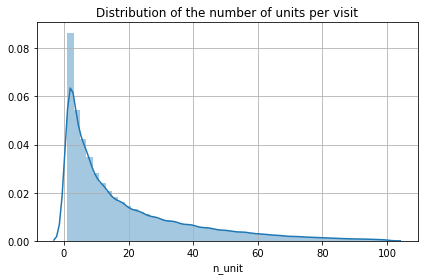

In [135]:
sns.distplot(df_trans.groupby('id')['n_unit'].sum()[df_trans.groupby('id')['n_unit'].sum() <= 100])
plt.grid(True)
plt.title("Distribution of the number of units per visit")
plt.tight_layout()

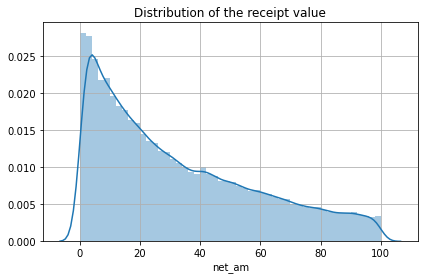

In [136]:
sns.distplot(df_trans.groupby('id')['net_am'].sum()[df_trans.groupby('id')['net_am'].sum() <= 100])
plt.grid(True)
plt.title("Distribution of the receipt value")
plt.tight_layout()

### How many people buy too many things or too expensive things?

In [204]:

print((df_trans.groupby('id')['n_unit'].sum() > 100).sum())
print((df_trans.groupby('id')['n_unit'].sum() > 100).sum() / df_trans.id.nunique() * 100, "% of customers bought more than 100 items per visit.")

4965
1.2200755881673555 % of customers bought more than 100 items per visit.


In [153]:
# healthy_people = df_trans[df_trans['Healthy'] == 1]
# unhealthy_people = df_trans[df_trans['Healthy'] == 0]

# adding total amount per each purchase and quantity of items per each purchase
df_both = df_trans.groupby('id')['n_unit'].sum().reset_index().merge(df_trans, on = 'id', how ='right', suffixes = ('_sum',None))
df_both = df_both.groupby('id')['net_am'].sum().reset_index().merge(df_both, on = 'id', how='right', suffixes = ('_sum',None))

df_with_total_recept = df_both[['id','customer','Healthy', 'mall','date','day_of_week','time','net_am_sum','n_unit_sum']].drop_duplicates()
df_with_total_recept.head()

# df_both.drop_duplicates(['customer', 'date', 'time'])

,id,customer,Healthy,mall,date,day_of_week,time,net_am_sum,n_unit_sum
0,1,77014474650,0,2,2016-01-14,Thur,17:14:00,16.25,11
9,2,77014474650,0,1,2016-01-14,Thur,16:14:00,10.65,4
12,3,77014474650,0,2,2016-01-14,Thur,16:14:00,4.85,1
13,4,77014474650,0,1,2016-01-14,Thur,20:14:00,4.75,2
15,5,77014474650,0,1,2016-01-14,Thur,17:14:00,7.67,2


In [157]:
df_both.head()

,id,net_am_sum,n_unit_sum,date,day_of_week,mall,customer,desc,net_am,n_unit,Healthy,time
0,1,16.25,11,2016-01-14,Thur,2,77014474650,cerveza koenigsbier,0.66,3,0,17:14:00
1,1,16.25,11,2016-01-14,Thur,2,77014474650,vino grand moment,5.80,1,0,17:14:00
2,1,16.25,11,2016-01-14,Thur,2,77014474650,gel & body milk,2.19,1,0,17:14:00
3,1,16.25,11,2016-01-14,Thur,2,77014474650,azucar bolsa papel,0.75,1,0,17:14:00
4,1,16.25,11,2016-01-14,Thur,2,77014474650,pan molde sandwich,0.93,1,0,17:14:00


In [184]:
print("mean receipt for healthy people", round(df_with_total_recept[df_with_total_recept['Healthy'] == 1].groupby('id')['net_am_sum'].mean().mean(),2))
print("mean receipt for unhealthy people", round(df_with_total_recept[df_with_total_recept['Healthy'] == 0].groupby('id')['net_am_sum'].mean().mean(),2))

print("mean number of items for healthy people", round(df_with_total_recept[df_with_total_recept['Healthy'] == 1].groupby('id')['n_unit_sum'].mean().mean(),2))
print("mean number of items for unhealthy people", round(df_with_total_recept[df_with_total_recept['Healthy'] == 0].groupby('id')['n_unit_sum'].mean().mean(),2))

print("median receipt for healthy people", round(df_with_total_recept[df_with_total_recept['Healthy'] == 1].groupby('id')['net_am_sum'].median().mean(),2))
print("median receipt for unhealthy people", round(df_with_total_recept[df_with_total_recept['Healthy'] == 0].groupby('id')['net_am_sum'].median().mean(),2))

print("median number of items for healthy people", round(df_with_total_recept[df_with_total_recept['Healthy'] == 1].groupby('id')['n_unit_sum'].median().mean(),2))
print("median number of items for unhealthy people", round(df_with_total_recept[df_with_total_recept['Healthy'] == 0].groupby('id')['n_unit_sum'].median().mean(),2))

print("mean unit price for healthy people", round(df_both[df_both['Healthy'] == 1].groupby('id')['net_am'].mean().mean(),2))
print("mean unit price for unhealthy people", round(df_both[df_both['Healthy'] == 0].groupby('id')['net_am'].mean().mean(),2))

print("median unit price for healthy people", round(df_both[df_both['Healthy'] == 1].groupby('id')['net_am'].median().mean(),2))
print("median unit price for unhealthy people", round(df_both[df_both['Healthy'] == 0].groupby('id')['net_am'].median().mean(),2))




mean receipt for healthy people 52.49
mean receipt for unhealthy people 52.27
mean number of items for healthy people 20.57
mean number of items for unhealthy people 20.1
median receipt for healthy people 52.49
median receipt for unhealthy people 52.27
median number of items for healthy people 20.57
median number of items for unhealthy people 20.1
mean unit price for healthy people 6.77
mean unit price for unhealthy people 6.62
median unit price for healthy people 5.86
median unit price for unhealthy people 5.7


Text(0.5, 1.0, 'Total number of items per visit')

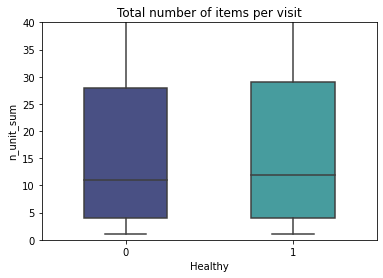

In [190]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.ylim(0, 40)

sns.boxplot( x="Healthy", y="n_unit_sum", data=df_with_total_recept, palette="mako", width = 0.5)
plt.title('Total number of items per visit')

Text(0.5, 1.0, 'Total receipt per visit')

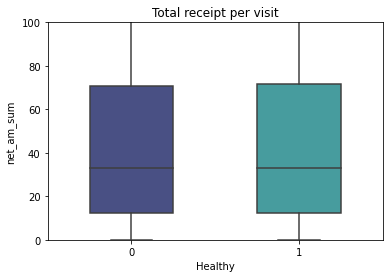

In [188]:
plt.ylim(0, 100)

sns.boxplot( x="Healthy", y="net_am_sum", data=df_with_total_recept, palette="mako", width = 0.5)
plt.title("Total receipt per visit")

In [141]:
df_trans

,date,day_of_week,id,mall,customer,desc,net_am,n_unit,Healthy,time
0,2016-01-14,Thur,1001,2,77021708271,caramelos s/azucar,1.00,1,0,20:07:00
1,2016-01-14,Thur,1002,1,77021708271,tosta variada,3.00,1,0,15:25:00
2,2016-01-14,Thur,1002,1,77021708271,baguette tortilla,1.00,1,0,15:25:00
3,2016-01-14,Thur,1003,2,77021708271,queso tierno mezcl,2.83,1,0,20:07:00
4,2016-01-14,Thur,1003,2,77021708271,guisantes muy fino,1.65,1,0,20:07:00
...,...,...,...,...,...,...,...,...,...,...
5609617,2016-04-17,Mon,581413,1,77023558475,patatas lays sal,2.43,2,0,00:00:00
5609618,2016-04-17,Mon,581413,1,77023558475,mayonesa 450 mlmus,2.14,2,0,00:00:00
5609619,2016-04-17,Mon,581413,1,77023558475,salsa cesar ensala,1.00,1,0,00:00:00
5609620,2016-04-17,Mon,581413,1,77023558475,bolsa carrefour,0.05,1,0,00:00:00


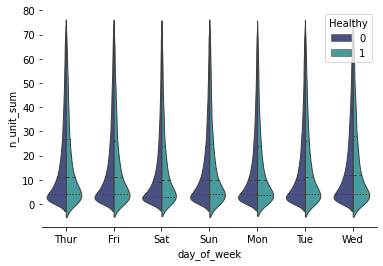

In [108]:
sns.violinplot(data=df_with_total_recept\
            [df_with_total_recept['n_unit_sum'] < df_with_total_recept.net_am_sum.quantile(0.75)], \
               x="day_of_week", y="n_unit_sum", hue="Healthy",
               split=True, inner="quart", linewidth=1,
               palette="mako")
#                palette={1: "b", 0: ".85"})
sns.despine(left=True)

In [146]:
healthy_people

,date,day_of_week,id,mall,customer,desc,net_am,n_unit,Healthy,time,unit_price
8961,2016-01-14,Thur,299,1,77052531701,titan hulk avengers,5.00,1,1,18:53:00,5.00
8962,2016-01-14,Thur,299,1,77052531701,jurassic titan t-rex,32.90,1,1,18:53:00,32.90
8963,2016-01-14,Thur,300,2,77052531701,cafe con leche,2.50,2,1,16:53:00,1.25
8964,2016-01-14,Thur,301,1,77052531701,"agua carrefour 0,5",0.24,1,1,15:52:00,0.24
8965,2016-01-14,Thur,301,1,77052531701,ensaladilla rusa 250,0.93,1,1,15:52:00,0.93
...,...,...,...,...,...,...,...,...,...,...,...
5609601,2016-04-17,Mon,581402,1,77030384651,pechuga de pavo 170g,1.85,1,1,00:02:00,1.85
5609602,2016-04-17,Mon,581402,1,77030384651,l casei fresa,1.00,1,1,00:02:00,1.00
5609603,2016-04-17,Mon,581402,1,77030384651,pimiento italiano,1.10,1,1,00:02:00,1.10
5609604,2016-04-17,Mon,581402,1,77030384651,3 bayetas ballerina,2.20,1,1,00:02:00,2.20


In [152]:
print('Mean receipt of unhealthy people is', round(df_with_total_recept[df_with_total_recept['Healthy'] == 0].\
      groupby('customer')['net_am_sum'].mean().mean(),2))
print('Mean receipt of healthy people is', round(df_with_total_recept[df_with_total_recept['Healthy'] == 1].\
      groupby('customer')['net_am_sum'].mean().mean(),2))

print('Mean number of items for healthy people is', round(healthy_people.groupby('id')['n_unit'].sum().mean(),2))
print('Mean number of items for unhealthy people is', round(unhealthy_people.groupby('id')['n_unit'].sum().mean(),2))

print('Mean price of an item of healthy people is', round(healthy_people.groupby('customer')['unit_price'].mean().mean(),2))
print('Mean price of an item of unhealthy people is', round(unhealthy_people.groupby('customer')['unit_price'].mean().mean(),2))

Mean receipt of unhealthy people is 53.4
Mean receipt of healthy people is 66.23
Mean number of items for healthy people is 20.57
Mean number of items for unhealthy people is 20.1
Mean price of an item of healthy people is 3.11
Mean price of an item of unhealthy people is 3.6


In [34]:
print("For ", round(len(df_with_total_recept[df_with_total_recept['Healthy'].notnull()]) / len(df_with_total_recept) \
      * 100, 2), "% of visits we were able to classify if the customer is healthy.")

For  100.0 % of visits we were able to classify if the customer is healthy.


### Let's look separately at healthy and unhealthy people.

### Healthy people

In [105]:
healthy_people = df_trans[df_trans['Healthy'] == 1]
unhealthy_people = df_trans[df_trans['Healthy'] == 0]

healthy_people['unit_price'] = healthy_people['net_am'] / healthy_people['n_unit'] # calculating unit price of a product 
unhealthy_people['unit_price'] = unhealthy_people['net_am'] / unhealthy_people['n_unit'] # calculating unit price of a product 


<ipython-input-105-55656e90e4af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthy_people['unit_price'] = healthy_people['net_am'] / healthy_people['n_unit'] # calculating unit price of a product
<ipython-input-105-55656e90e4af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unhealthy_people['unit_price'] = unhealthy_people['net_am'] / unhealthy_people['n_unit'] # calculating unit price of a product


In [106]:
print(healthy_people.groupby('customer')['unit_price'].median().describe())
print(unhealthy_people.groupby('customer')['unit_price'].median().describe())

# healthy_people

count    4373.000000
mean        1.899921
std         0.410631
min         0.430000
25%         1.670000
50%         1.875000
75%         2.000000
max         6.350000
Name: unit_price, dtype: float64
count    50276.000000
mean         2.443665
std          7.398265
min          0.050000
25%          1.600000
50%          1.850000
75%          2.090000
max        859.000000
Name: unit_price, dtype: float64


The median price of an item in one's basket is roughly **1.86 euros**. 

In [39]:
threshold = int(len(healthy_people.groupby('id')['unit_price'].median().sort_values())*0.8)
sorted_median_price = healthy_people.groupby('id')['unit_price'].median().sort_values().reset_index()

print("A median price of an item in 80% of baskets is less or equal to", sorted_median_price.iloc[threshold,1])

A median price of an item in 80% of baskets is less or equal to 3.225


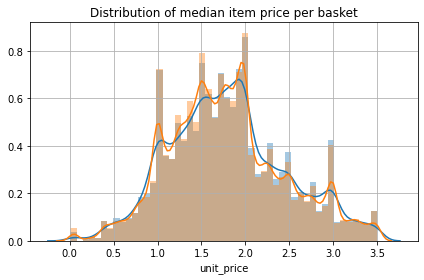

In [148]:
sns.distplot(healthy_people.groupby('id')['unit_price'].median()[healthy_people.groupby('id')['unit_price'].median() <= 3.5])
sns.distplot(unhealthy_people.groupby('id')['unit_price'].median()[unhealthy_people.groupby('id')['unit_price'].median() <= 3.5])

plt.grid(True)
plt.title("Distribution of median item price per basket")
plt.tight_layout()

### What are the most expensive purchases?

In [217]:
healthy_people['unit_price'].drop_duplicates().sort_values(ascending = False)[:10]

3741714    1899.0
4201001    1169.0
37456       899.0
1771794     849.0
356596      799.0
2297202     749.0
1362187     699.0
2408941     669.0
1858208     649.0
2739887     629.0
Name: unit_price, dtype: float64

In [218]:
unhealthy_people['unit_price'].drop_duplicates().sort_values(ascending = False)[:10]

2999756    2299.0
4789502    1999.0
1923589    1899.0
1355246    1649.0
1328994    1569.0
1195100    1499.0
3592807    1299.0
645306     1249.0
1844516    1239.0
1942041    1199.0
Name: unit_price, dtype: float64

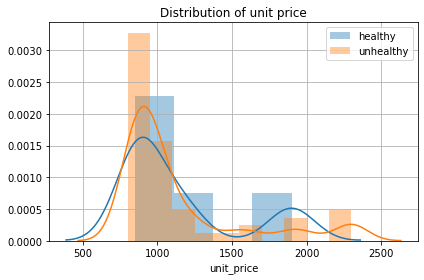

In [232]:
sns.distplot(healthy_people['unit_price'][healthy_people['unit_price'] > 800], label = 'healthy')
sns.distplot(unhealthy_people['unit_price'][unhealthy_people['unit_price'] > 800], label = 'unhealthy')

plt.grid(True)
plt.title("Distribution of unit price")
plt.tight_layout()
plt.legend()

In [242]:
# df_trans['unit_price'] = df_trans['net_am'] / df_trans['n_unit']
rich_customers = df_trans.drop_duplicates('customer').sort_values('unit_price', ascending = False)[:1000]

In [243]:
# df_trans.sort_values('unit_price', ascending = False)[:100].value_counts('Healthy')
df_trans.id.isin(rich_customers).value_counts('Healthy')


False    1.0
Name: id, dtype: float64

### When do people shop? 

number of visits by healthy and unhealthy people    Healthy      id
0        0  370490
1        1   36452
number of healthy and unhealthy customers    Healthy  customer
0        0     50276
1        1      4373
there are 10.163777021836935 times more visits by unhealthy people
there are 11.496912874456894 times more unhealthy customers


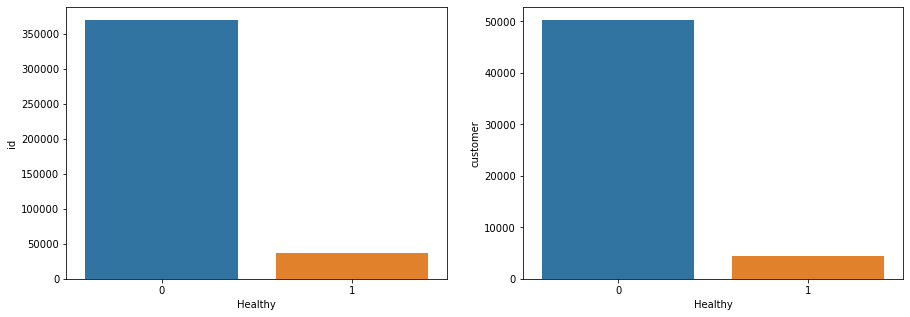

In [57]:
print("number of visits by healthy and unhealthy people" , df_trans.groupby('Healthy')['id'].nunique().reset_index())
print("number of healthy and unhealthy customers" , df_trans.groupby('Healthy')['customer'].nunique().reset_index())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))


sns.barplot(ax = axes[0], x="Healthy", y="id", data=df_trans.groupby('Healthy')['id'].nunique().reset_index())
sns.barplot(ax = axes[1], x="Healthy", y="customer", data=df_trans.groupby('Healthy')['customer'].nunique().reset_index())

print("there are", df_trans.groupby('Healthy')['id'].nunique()[0]/df_trans.groupby('Healthy')['id'].nunique()[1], "times more visits by unhealthy people")
print("there are", df_trans.groupby('Healthy')['customer'].nunique()[0]/df_trans.groupby('Healthy')['customer'].nunique()[1], "times more unhealthy customers")




In [46]:
df_trans.groupby(['day_of_week', 'Healthy'])['id'].count().sort_values(ascending=False)

day_of_week  Healthy
Fri          0          788586
Wed          0          784553
Thur         0          746227
Tue          0          738836
Sat          0          722051
Mon          0          685208
Sun          0          605674
Wed          1           79846
Tue          1           74841
Thur         1           74160
Fri          1           69650
Mon          1           68359
Sat          1           67685
Sun          1           60960
Name: id, dtype: int64

Text(0.5, 1.0, 'Distribution of visits by healthy people across the week')

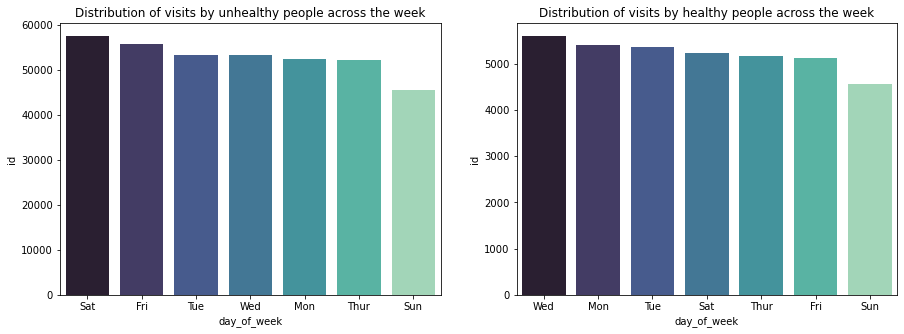

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(ax = axes[0], x = 'day_of_week', y = 'id', data = df_trans[df_trans['Healthy']==0].groupby('day_of_week')['id'].\
            nunique().reset_index().sort_values('id', ascending=False), palette="mako")
axes[0].set_title('Distribution of visits by unhealthy people across the week')

sns.barplot(ax = axes[1], x = 'day_of_week', y = 'id', data = df_trans[df_trans['Healthy']==1].\
            groupby('day_of_week')['id'].nunique().reset_index().sort_values('id', ascending=False), palette="mako")
axes[1].set_title('Distribution of visits by healthy people across the week')

In [75]:
from sklearn.preprocessing import MinMaxScaler

values = df_trans[df_trans['Healthy'] == 1].groupby('time')['id'].nunique().values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized_healthy = scaler.transform(values)

values = df_trans[df_trans['Healthy'] == 0].groupby('time')['id'].nunique().values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized_unhealthy = scaler.transform(values)
normalized_healthy


Min: 1.000000, Max: 77.000000
Min: 1.000000, Max: 627.000000


array([[0.05263158],
       [0.17105263],
       [0.07894737],
       ...,
       [0.03947368],
       [0.03947368],
       [0.03947368]])

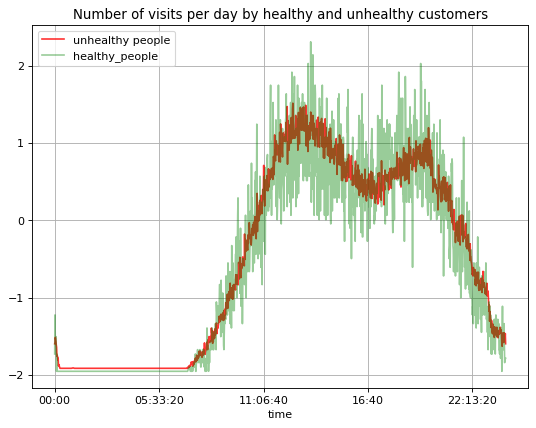

In [98]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80)

ax2 = ((df_trans[df_trans['Healthy'] == 0].groupby('time')['id'].nunique() - \
                        df_trans[df_trans['Healthy'] == 0].groupby('time')['id'].nunique().mean())/df_trans[df_trans['Healthy'] == 0].\
                        groupby('time')['id'].nunique().std()).plot(color='red', alpha = 0.8, grid=True, label='unhealthy people')
ax1 = ((df_trans[df_trans['Healthy'] == 1].groupby('time')['id'].nunique() - \
                        df_trans[df_trans['Healthy'] == 1].groupby('time')['id'].nunique().mean())/df_trans[df_trans['Healthy'] == 1].\
                        groupby('time')['id'].nunique().std()).plot(color='green', alpha = 0.4, grid=True, label='healthy_people')

plt.title("Number of visits per day by healthy and unhealthy customers")
plt.legend()

In [250]:
df = pd.read_csv("/Users/aliyadavletshina/Downloads/standardized_data.csv")


In [252]:
df.head()
df_standardized = pd.merge(df.reset_index(), df_healthy.reset_index()[['customer', 'Healthy']], how ='inner', on = 'customer')
df_standardized.head()

,index,customer,Carrefour product,Contains plastic / made up of plastic (contains string 'filmado'),Very Salty,Junk / Fatty,"""Raffinato""",Fruit - list internet,Vegetable and greens - List on internet,Family product,...,Clothes,Hygiene,For children,Medical,Woman,Plants,Discounts,Man,net_am,Healthy
0,0,77000001548,-0.158321,-0.053447,-0.350373,0.337635,-0.097112,-0.180019,-0.028216,-0.032503,...,-0.150810,0.304416,-0.085269,-0.155957,-0.131868,-0.057960,-0.034186,-0.057877,-0.080189,0
1,1,77000001680,-0.096066,-0.028327,0.037753,0.157667,-0.059877,-0.277066,0.006771,0.031094,...,0.019058,0.137045,-0.085269,-0.117979,-0.131868,-0.057960,-0.034186,-0.057877,-0.064374,0
2,2,77000002166,-0.015346,0.000591,0.111469,-0.026350,-0.051519,-0.257449,-0.046120,-0.069408,...,-0.078354,-0.195917,-0.085269,-0.058762,-0.034960,0.119172,-0.034186,-0.057877,-0.157043,0
3,3,77000004744,-0.190864,-0.037327,0.347066,0.131442,-0.215505,-0.366925,0.012306,-0.311227,...,-0.058155,0.038787,-0.085269,-0.093811,-0.007944,-0.057960,-0.034186,-0.057877,-0.098536,0
4,4,77000005496,-0.443657,-0.062196,-0.448311,-0.592346,0.284225,1.313724,-0.019195,-0.365278,...,-0.150810,-0.403379,-0.085269,-0.155957,-0.131868,-0.057960,-0.034186,-0.057877,-0.100717,0


In [255]:
df_standardized.Healthy.describe()

count    54646.000000
mean         0.080024
std          0.271333
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Healthy, dtype: float64

In [261]:
df_standardized.columns = ['index', 'customer', 'Carrefour product',
       'Contains plastic',
       'Very salty', 'Junk', 'Refined', 'Fruit',
       'Vegetables', 'Family product', 'Alcohol',
       'Ready to eat', 'Snacks', 'High in sugar',
       'Packed in glass or aluminum', 'Condimenti', 'Cook', 'Integrale', 'Egg',
       'Fish', 'White meat', 'Red meat',
       'Dairy', 'Drinks', 'Coffee',
       'For pets', 'Legumes', 'Fitness products', 'Cereals',
       'Instruments to cook', 'One-time use product', 'House products',
       'Clothes', 'Hygiene', 'For children', 'Medical', 'Woman', 'Plants',
       'Discounts', 'Man', 'net_am', 'Healthy']

# Fruit	Vegetable	Red meat	Fish	Egg	Snacks	Junk	Ready to eat/drink	Alcohol	Contains plastic	

<ipython-input-288-6d0c58744993>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=df_standardized.groupby("Healthy")['Vegetables','Fruit','Junk','Egg','Snacks','Ready to eat',\


<Figure size 1152x432 with 0 Axes>

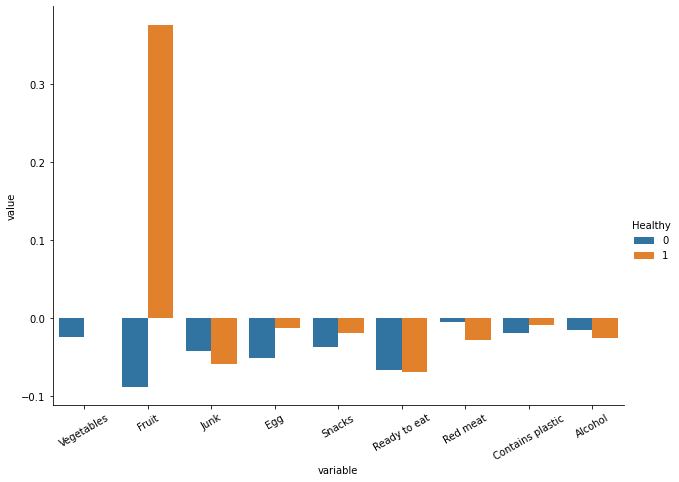

In [288]:
plt.figure(figsize=(16, 6))
# fig.set_size_inches(11.7, 8.27)

g = sns.catplot(x="variable", y="value",
               hue="Healthy",
               data=df_standardized.groupby("Healthy")['Vegetables','Fruit','Junk','Egg','Snacks','Ready to eat',\
                                    'Red meat','Contains plastic','Alcohol'].mean().reset_index().melt(id_vars =['Healthy']), kind="bar",\
               height=6.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=30)

<ipython-input-290-4c0958824c97>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=df_standardized.groupby("Healthy")['High in sugar','Packed in glass or aluminum', \


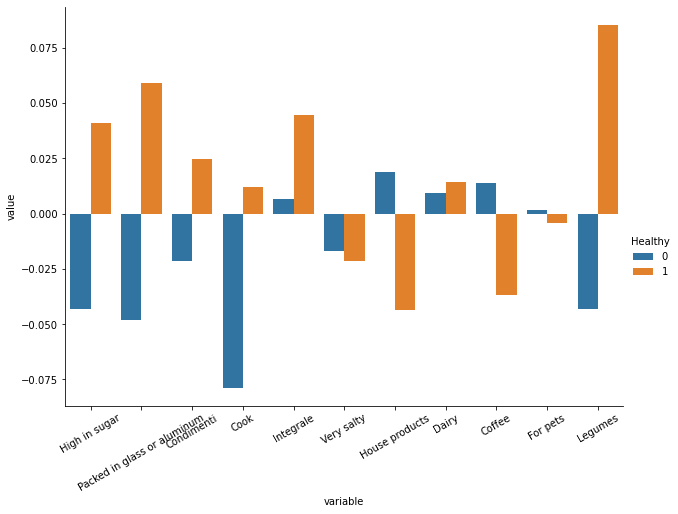

In [290]:

g = sns.catplot(x="variable", y="value",
               hue="Healthy",
               data=df_standardized.groupby("Healthy")['High in sugar','Packed in glass or aluminum', \
                                                       'Condimenti', 'Cook', 'Integrale','Very salty','House products',\
                                                       'Dairy','Coffee','For pets', 'Legumes'].\
                mean().reset_index().melt(id_vars =['Healthy']), kind="bar",\
               height=6.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=30)

# 'Fish', 'White meat', 'Red meat',
#        'Dairy', 'Drinks', 'Coffee',
#        'For pets', 'Legumes', 'Fitness products', 'Cereals',
#        'Instruments to cook', 'One-time use product', 'House products',
#        'Clothes', 'Hygiene', 'For children', 'Medical', 'Woman', 'Plants',